In [2]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# read csv file
df = pd.read_csv('dataset/jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
# convert 'Date Time' from object to datetime
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


# Feature Engineering

In [5]:
# make the date time in range of per hour instead of per 10 minutes
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


<Axes: xlabel='Date Time'>

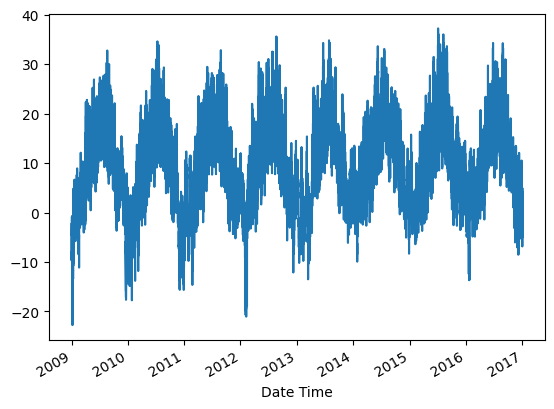

In [7]:
temp = df['T (degC)']
temp.plot()

In [8]:
# extract second from 'Date Time' in temp df
temp_df = pd.DataFrame({'Temperature': temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [10]:
# create new columns by performing sin cos transformation to 'Seconds' column
day = 60*60*24
year = 365.2425*day

temp_df['day_sin'] = np.sin(temp_df['Seconds'] * (2*np.pi / day))
temp_df['day_cos'] = np.cos(temp_df['Seconds'] * (2*np.pi / day))
temp_df['year_sin'] = np.sin(temp_df['Seconds'] * (2*np.pi / year))
temp_df['year_cos'] = np.cos(temp_df['Seconds'] * (2*np.pi / year))

temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,day_sin,day_cos,year_sin,year_cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


# Data Preprocessing

In [11]:
# windowing dataset >> make time series data into the form of supervised learning data
# [[[1], [2], [3], [4], [5], [6], [7], [8], [9]]] [10]
# [[[2], [3], [4], [5], [6], [7], [8], [9], [10]]] [11]
# [[[3], [4], [5], [6], [7], [8], [9], [10], [11]]] [12]

def df_to_X_y(df, window_size=9):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0] #our label placed in column 0
        y.append(label)
        
    return np.array(X), np.array(y)

In [12]:
X, y = df_to_X_y(temp_df, window_size=9)
print(X.shape, y.shape)

(70082, 9, 5) (70082,)


In [18]:
# splitting data manually
X_train, y_train = X[:50000], y[:50000]
X_valid, y_valid = X[50000:60000], y[50000:60000]
X_test, y_test = X[60000:], y[60000:]

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(50000, 9, 5) (50000,) (10000, 9, 5) (10000,) (10082, 9, 5) (10082,)


In [19]:
# scaling data using standarization
temp_training_mean = np.mean(X_train[:, :, 0])
temp_training_std = np.std(X_train[:, :, 0])

def standarized(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std #just like when we fit scaler to train set
    return X

In [20]:
# transform origin X into standarized X
standarized(X_train)
standarized(X_valid)
standarized(X_test)

array([[[-3.66568718e-01,  2.58819045e-01, -9.65925826e-01,
         -8.37418535e-01,  5.46562163e-01],
        [ 7.46313345e-02,  8.46725985e-12, -1.00000000e+00,
         -8.37026554e-01,  5.47162269e-01],
        [ 4.97303301e-01, -2.58819045e-01, -9.65925826e-01,
         -8.36634142e-01,  5.47762094e-01],
        ...,
        [ 5.13515377e-01, -9.65925826e-01, -2.58819045e-01,
         -8.35060201e-01,  5.50158578e-01],
        [ 3.51394622e-01, -1.00000000e+00, -1.10306040e-11,
         -8.34665642e-01,  5.50756993e-01],
        [ 2.26330040e-01, -9.65925826e-01,  2.58819045e-01,
         -8.34270655e-01,  5.51355125e-01]],

       [[ 7.46313345e-02,  8.46725985e-12, -1.00000000e+00,
         -8.37026554e-01,  5.47162269e-01],
        [ 4.97303301e-01, -2.58819045e-01, -9.65925826e-01,
         -8.36634142e-01,  5.47762094e-01],
        [ 7.17324325e-01, -5.00000000e-01, -8.66025404e-01,
         -8.36241301e-01,  5.48361638e-01],
        ...,
        [ 3.51394622e-01, -1.0000000

# Modeling

In [24]:
# construct Simple RNN model
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(128, input_shape=(9,temp_df.shape[1])))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# save best weights only
cp1 = ModelCheckpoint('mult_model/', save_best_only=True)

# model compiling
model.compile(
    loss='mean_squared_error',
    optimizer='RMSProp',
    metrics=[RootMeanSquaredError()]
)

# model training
model.fit(X_train,
          y_train,
          validation_data=(X_valid, y_valid),
          epochs=10,
         callbacks=cp1)

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 2.7560 - root_mean_squared_error: 1.6601 - val_loss: 1.7796 - val_root_mean_squared_error: 1.3340
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7152 - root_mean_squared_error: 0.8457 - val_loss: 0.5623 - val_root_mean_squared_error: 0.7499
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6450 - root_mean_squared_error: 0.8031 - val_loss: 0.7291 - val_root_mean_squared_error: 0.8539
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6174 - root_mean_squared_error: 0.7857 - val_loss: 0.6773 - val_root_mean_squared_error: 0.8230
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5981 - root_mean_squared_error: 0.7734 - val_loss: 0.6204 - val_root_mean_squared_error: 0.7877
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5844 - root_mean_squared_error: 0.7645 - val_

# Prediction and Evaluation

In [26]:
#RMSE score in each set
train_predictions = model.predict(X_train)
valid_predictions = model.predict(X_valid)
test_predictions = model.predict(X_test)

print('RMSE in train set:', np.sqrt(mean_squared_error(train_predictions, y_train)))
print('RMSE in validation set:', np.sqrt(mean_squared_error(valid_predictions, y_valid)))
print('RMSE in test set:', np.sqrt(mean_squared_error(test_predictions, y_test)))

316/316 [==============================] - 1s 3ms/step
RMSE in train set: 0.7306008662059391
RMSE in validation set: 0.7401736300907095
RMSE in test set: 0.686191770642014


In [29]:
def plot_predictions(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten() #make it into 1D array
    df = pd.DataFrame(data = {'Predictions':predictions,
                              'Actuals': y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, np.sqrt(mean_squared_error(predictions,y))

1563/1563 [==============================] - 6s 4ms/step


(       Predictions  Actuals
 0        -7.284263    -7.04
 1        -6.551529    -7.41
 2        -7.263019    -6.87
 3        -6.673640    -5.89
 4        -5.785499    -5.94
 ...            ...      ...
 49995    15.012858    14.24
 49996    15.246123    14.19
 49997    15.312242    14.36
 49998    15.382247    14.53
 49999    15.335092    15.06
 
 [50000 rows x 2 columns],
 0.7306008662059391)

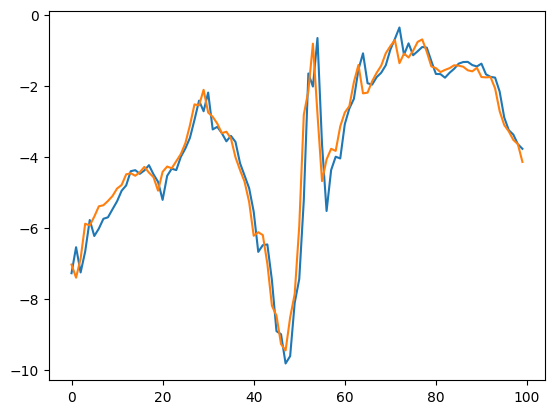

In [31]:
plot_predictions(model, X_train, y_train) #forecasting result in train set

313/313 [==============================] - 1s 4ms/step


(      Predictions  Actuals
 0       15.740954    15.32
 1       15.783296    15.59
 2       15.965146    16.01
 3       16.306801    15.85
 4       15.904729    15.87
 ...           ...      ...
 9995    16.280594    15.54
 9996    15.497930    14.02
 9997    13.063517    13.67
 9998    12.865561    12.27
 9999    11.427979    11.19
 
 [10000 rows x 2 columns],
 0.7401736300907095)

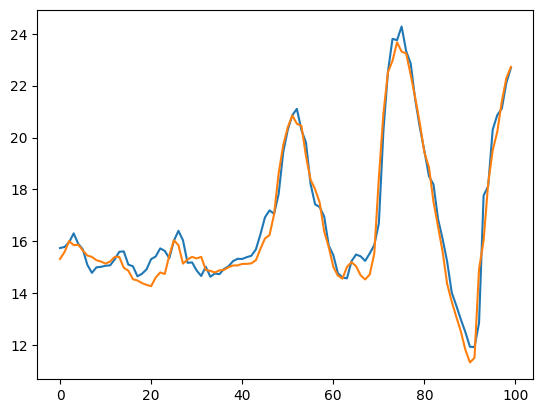

In [32]:
plot_predictions(model, X_valid, y_valid) #forecasting result in validation set

316/316 [==============================] - 1s 4ms/step


(       Predictions  Actuals
 0        10.564585    10.85
 1        10.559504     9.95
 2         9.650532     9.98
 3        10.047917     8.64
 4         8.487796     8.64
 ...            ...      ...
 10077    -0.851531    -0.98
 10078    -1.522964    -1.40
 10079    -1.927803    -2.75
 10080    -3.292341    -2.89
 10081    -3.136983    -3.93
 
 [10082 rows x 2 columns],
 0.686191770642014)

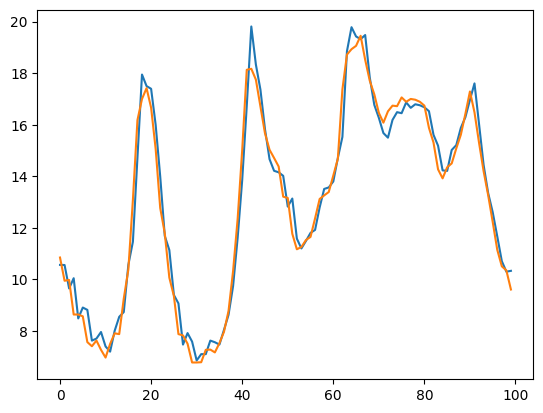

In [30]:
plot_predictions(model, X_test, y_test) #forecasting result in test set